In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
force_data = pd.read_csv("../dataset/GP1_0.6_force.csv")
marker_data = pd.read_csv("../dataset/GP1_0.6_marker.csv")


In [2]:
force_data.head()

,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z
0,0.0,-9.537293,0.0,30.241894,0.0,777.790222
1,0.0,-8.993257,0.0,30.251348,0.0,777.832886
2,0.0,-8.459884,0.0,30.250864,0.0,777.852966
3,0.0,-7.937055,0.0,30.241360,0.0,777.852539
4,0.0,-7.424666,0.0,30.223719,0.0,777.833374


In [3]:
marker_data.head()

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,...,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,...,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,...,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,...,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,...,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,...,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651


### Data Cleaning

In [4]:
# Drop rows with missing values (if applicable)
force_data.dropna(inplace=True)
marker_data.dropna(inplace=True)

# Remove duplicates
force_data = force_data.drop_duplicates()
marker_data = marker_data.drop_duplicates()

### Data Preprocessing

In [5]:
# Combine force and marker data
combined_data = pd.concat([force_data, marker_data], axis=1)

# Simulate gait phase labels for multiclass classification (e.g., 'Stance', 'Swing', 'Toe-off')
# For demonstration, use synthetic labels based on index
np.random.seed(42)
gait_phases = ['Stance', 'Swing', 'Toe-off']
combined_data['gait_phase'] = np.random.choice(gait_phases, size=combined_data.shape[0])

# Separate features and labels
features = combined_data.drop('gait_phase', axis=1)
labels = combined_data['gait_phase']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


### Exploratory Data Analysis

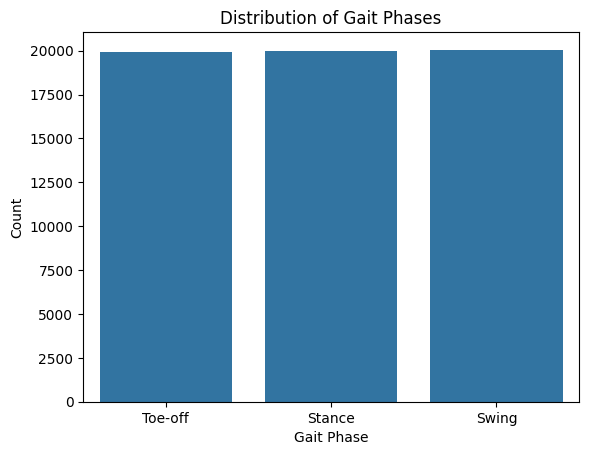

In [6]:
# Visualize label distribution
sns.countplot(x=labels)
plt.title("Distribution of Gait Phases")
plt.xlabel("Gait Phase")
plt.ylabel("Count")
plt.show()



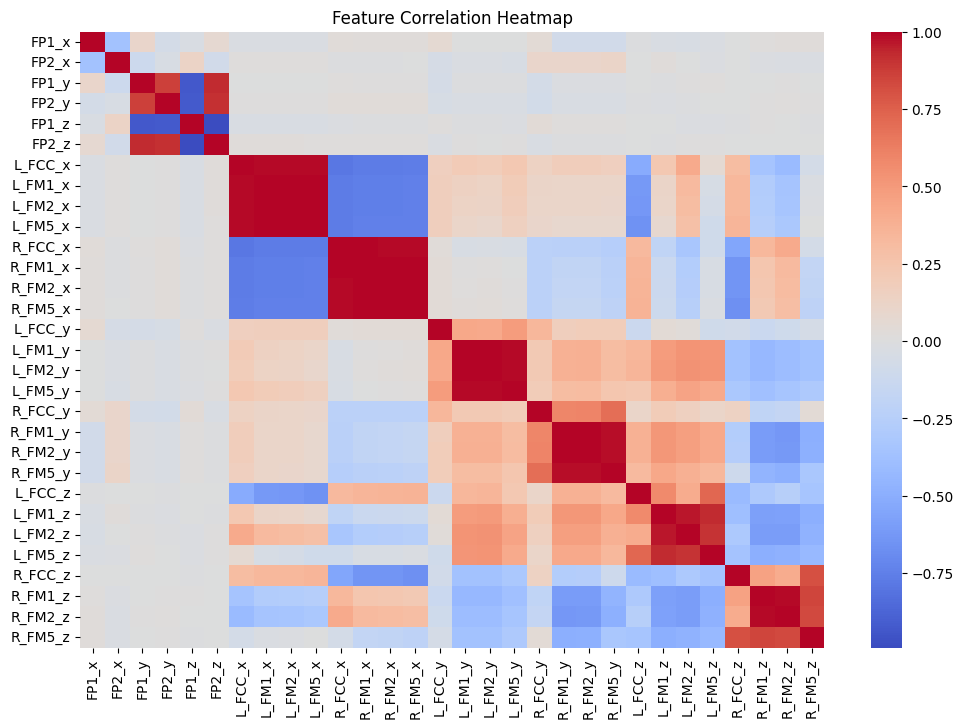

In [7]:
# Feature correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = pd.DataFrame(features_scaled, columns=features.columns).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

### Model Training

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.33059524 0.33357143 0.3372619  0.33154762 0.33666667]
Mean CV Score: 0.3339285714285714


The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

So, in above Mean CV Score: 0.3339285714285714 is not an optimal model

### Evaluation

In [9]:
# Make predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)



Confusion Matrix:
 [[ 596 4981  481]
 [ 604 4906  452]
 [ 646 4847  487]]

Classification Report:
               precision    recall  f1-score   support

      Stance       0.32      0.10      0.15      6058
       Swing       0.33      0.82      0.47      5962
     Toe-off       0.34      0.08      0.13      5980

    accuracy                           0.33     18000
   macro avg       0.33      0.33      0.25     18000
weighted avg       0.33      0.33      0.25     18000


Accuracy Score: 0.3327222222222222


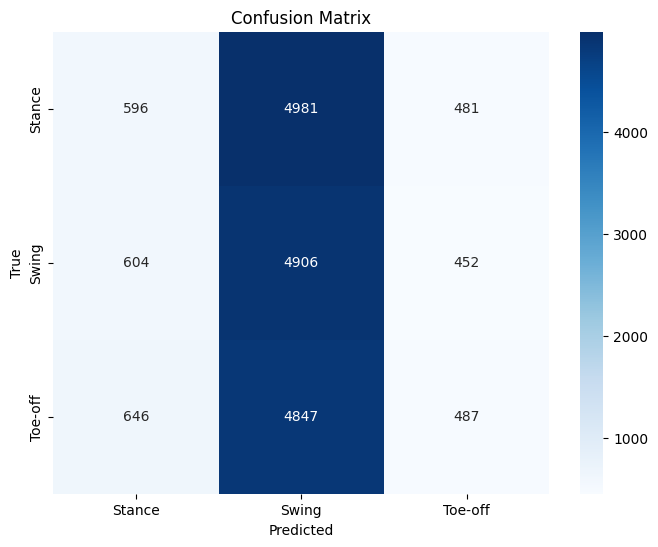

In [10]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=gait_phases, yticklabels=gait_phases)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Modeling

In [28]:
# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gbc.fit(X_train, y_train)

# Cross-validation (optional, for robust evaluation)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [29]:
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())

NaN values in X_train: 807624
NaN values in X_test: 344376


In [32]:
print("Rows with NaN in X_train:\n")
display(X_train[np.isnan(X_train).any(axis=1)])
print("Rows with NaN in X_test:\n")
display(X_test[np.isnan(X_test).any(axis=1)])

Rows with NaN in X_train:



array([[ 1.79813030e+00, -2.16664353e-02, -1.14378711e+00, ...,
                    nan,             nan,             nan],
       [ 1.80960328e+00,  2.80077005e-01, -1.21027783e+00, ...,
                    nan,             nan,             nan],
       [-5.67213548e-01,  2.42725006e+00,  9.45301401e-01, ...,
                    nan,             nan,             nan],
       ...,
       [-5.66154881e-04,  1.01686855e+00,  9.59940722e-01, ...,
                    nan,             nan,             nan],
       [-1.67488881e-02, -1.76563576e+00,  8.40313516e-01, ...,
                    nan,             nan,             nan],
       [ 5.51973397e-01, -1.48338270e+00,  6.94520487e-01, ...,
                    nan,             nan,             nan]])

Rows with NaN in X_test:



array([[-0.12583595, -2.25984144,  0.8526805 , ...,         nan,
                nan,         nan],
       [ 1.18934401, -1.55195835,  0.93043681, ...,         nan,
                nan,         nan],
       [-1.75014209,  1.66667568, -0.66879076, ...,         nan,
                nan,         nan],
       ...,
       [ 0.01099924,  0.17717179,  0.96288475, ...,         nan,
                nan,         nan],
       [ 0.03811772,  1.29300214,  0.92629053, ...,         nan,
                nan,         nan],
       [-1.07762857, -0.12942378, -1.80051341, ...,         nan,
                nan,         nan]])

### Filling Missing Values
Replace NaN with a Default Value (e.g., Mean or Median) or
Drop Rows/Columns with NaN (if minimal impact on data):

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Replace NaN with column mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Option to drop rows with NaN values
# X_train = X_train[~np.isnan(X_train).any(axis=1)]
# y_train = y_train[~np.isnan(X_train).any(axis=1)]  # Ensure labels align

# X_test = X_test[~np.isnan(X_test).any(axis=1)]
# y_test = y_test[~np.isnan(X_test).any(axis=1)]

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gbc = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [35]:
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.32785714 0.33869048 0.33166667 0.33535714 0.335     ]
Mean CV Score: 0.33371428571428574


In [36]:
# Make predictions
y_pred = gbc.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Accuracy Score: 0.33205555555555555

Confusion Matrix:
 [[1298 3118 1642]
 [1287 3025 1650]
 [1276 3050 1654]]

Classification Report:
               precision    recall  f1-score   support

      Stance       0.34      0.21      0.26      6058
       Swing       0.33      0.51      0.40      5962
     Toe-off       0.33      0.28      0.30      5980

    accuracy                           0.33     18000
   macro avg       0.33      0.33      0.32     18000
weighted avg       0.33      0.33      0.32     18000



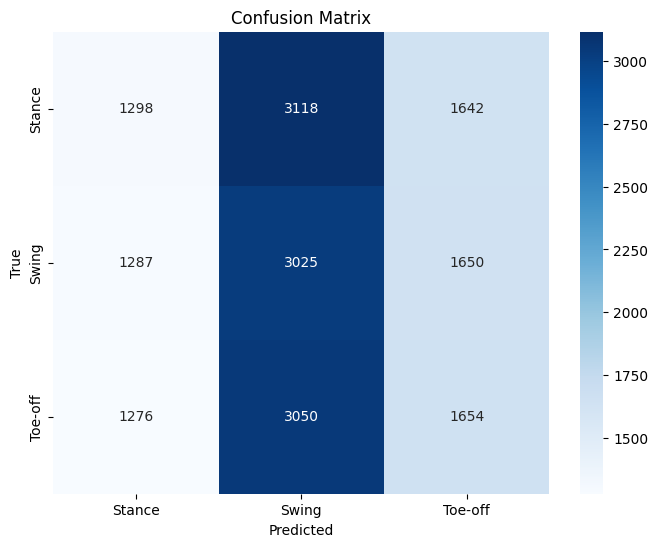

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=gait_phases, yticklabels=gait_phases)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Note
Since the data is not huge (I took small sample of data to only practice) so the model does not perform well